### Dataset criado artificialmente

0    947
1     53
Name: count, dtype: int64


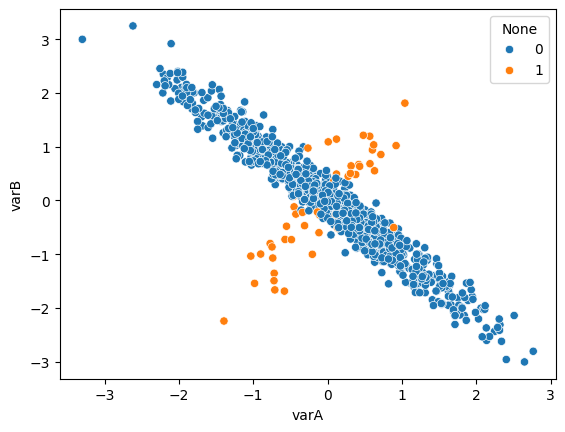

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000,
                        n_features=2,
                        n_redundant=0,
                        n_clusters_per_class=1,
                        class_sep=0,
                        weights=[0.95])

# trasform arrays into pandas df and series
X = pd.DataFrame(X, columns =['varA', 'varB'])
y = pd.Series(y)

print(y.value_counts())

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.show()

In [ ]:
# 1) Usar a base de dados desbalanceada gerada na célula anterior para comparar os métodos
#de Oversampling e Undersampling
# 2) Treinar uma árvore de decisão e verificar a acurácia dela para o dataset gerado
# 3) Usar o NearMiss para fazer Undersampling da classe majoritária
# 4) Treinar uma árvore de decisão com os dados modificados pelo NearMiss
# 5) Verificar a acurária da árvore de decisão treinada anteriormente
# 6) Usar o método de Oversamplig SMOTE para alterar o dataset original
# 7) Treinar uma árvore de decisão com os dados alterados pelo SMOTE
# 8) Verificar o desempenho da árvore treinada anteriormente

# Na API do SkLearn existem mais métodos de Over e Undersampling, além dos já vistos na aula
# (NearMiss e SMOTE). Vamos usar dois desses métodos: "RandomUnderSampler" e "RandomOverSampler"
# O link de acesso para a API é: https://imbalanced-learn.org/stable/introduction.html

# 9) Usar o método "RandomUnderSampler" para alterar o dataset original
# 10) Treinar uma árvore de decisão com os dados alterados pelo "RandomUnderSampler"
# 11) Verificar o desempenho da árvore treinada anteriormente
# 12) Usar o método "RandomOverSampler" para alterar o dataset original
# 13) Treinar uma árvore de decisão com os dados alterados pelo "RandomOverSampler"
# 14) Verificar o desempenho da árvore treinada anteriormente

In [ ]:
# 2) Treinar uma árvore de decisão e verificar a acurácia dela para o dataset gerado
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None, stratify=y)
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=8)
modelo.fit(X_train, y_train)

resultados = modelo.predict(X_test)
acertos = round( metrics.accuracy_score(resultados,y_test)*100)
print(f"Percentual de acertos da Árvore de Decisão: {acertos}%")

Percentual de acertos da Árvore de Decisão: 96%


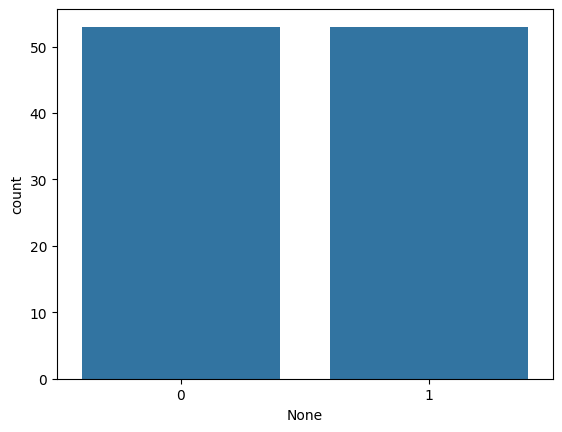

In [ ]:
# 3) Usar o NearMiss para fazer Undersampling da classe majoritária
from imblearn.under_sampling import NearMiss

nr = NearMiss()

Xnm, ynm = nr.fit_resample(X,y)

ax = sns.countplot(x=ynm)

In [ ]:
# 4) Treinar uma árvore de decisão com os dados modificados pelo NearMiss

X_train, X_test, y_train, y_test = train_test_split(Xnm, ynm, random_state=None, stratify=ynm)

modelo2 = DecisionTreeClassifier(criterion = "entropy", max_depth = 8)
modelo2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
# 5) Verificar a acurária da árvore de decisão treinada anteriormente

resultados = modelo2.predict(X_test)
acertos = round(metrics.accuracy_score(resultados, y_test)*100)

print(f"Percentual de acertos nos dados balancaedos (undersampling NearMiss) da Árvore de Decisão {acertos}%")

Percentual de acertos nos dados balancaedos (undersampling NearMiss) da Árvore de Decisão 81%


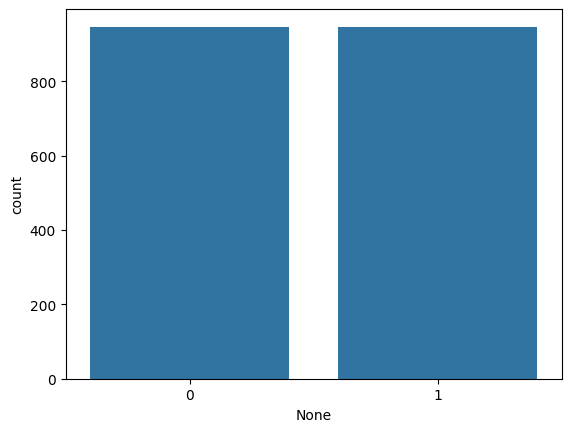

In [ ]:
# 6) Usar o método de Oversamplig SMOTE para alterar o dataset original
from imblearn.over_sampling import SMOTE

smt = SMOTE()
Xsmt, ysmt = smt.fit_resample(X,y)

ax = sns.countplot(x=ysmt)

In [ ]:
# 7) Treinar uma árvore de decisão com os dados alterados pelo SMOTE

X_train, X_test, y_train, y_test = train_test_split(Xsmt, ysmt, random_state=None, stratify=ysmt)

modelo3 = DecisionTreeClassifier(criterion="entropy", max_depth=8)
modelo3.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
# 8) Verificar o desempenho da árvore treinada anteriormente

resultados = modelo3.predict(X_test)
acertos = round(metrics.accuracy_score(resultados,y_test)*100)

print(f"Percentual de acertos nos dados balanceados (Oversampling SMOTE) da Árvore de Decisão: {acertos}%")

Percentual de acertos nos dados balanceados (Oversampling SMOTE) da Árvore de Decisão: 88%


Acontece um queda no percentual de acertos quando usamos o NearMiss e o SMOTE, isso é natural ou é um erro?



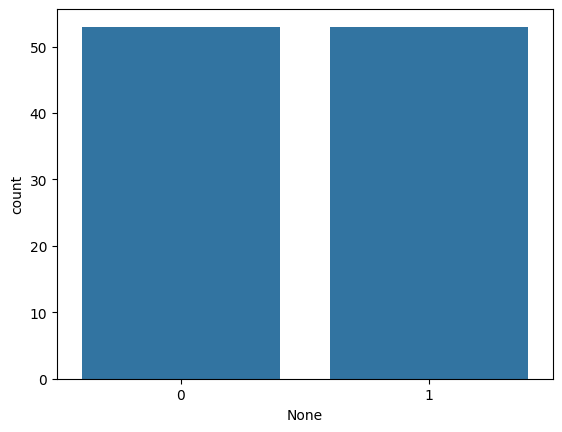

In [ ]:
# 9) Usar o método "RandomUnderSampler" para alterar o dataset original
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

Xrus, yrus = rus.fit_resample(X,y)

ax = sns.countplot(x=yrus)

In [ ]:
# 10) Treinar uma árvore de decisão com os dados alterados pelo "RandomUnderSampler"
# 11) Verificar o desempenho da árvore treinada anteriormente

X_train, X_test, y_train, y_test = train_test_split(Xrus, yrus, random_state=None, stratify=yrus)

modelo4 = DecisionTreeClassifier(criterion="entropy",max_depth=8)
modelo4.fit(X_train,y_train)

resultados = modelo4.predict(X_test)
acertos = round(metrics.accuracy_score(resultados,y_test)*100)

print(f"Acertos nos dados balanceado (RandomUnderResample) da Árvore de Decisão: {acertos}%")

Acertos nos dados balanceado (RandomUnderResample) da Árvore de Decisão: 81%


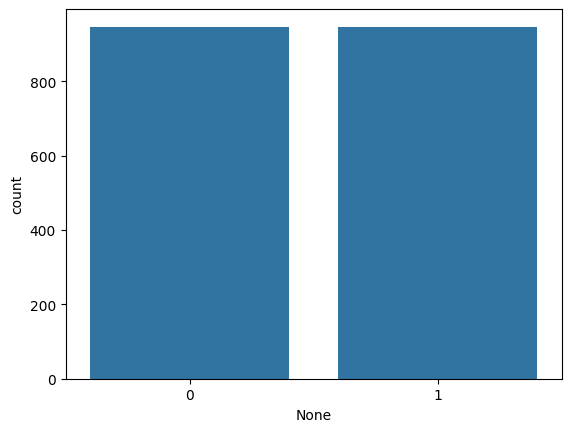

In [ ]:
# 12) Usar o método "RandomOverSampler" para alterar o dataset original
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

Xros, yros = ros.fit_resample(X,y)

ax = sns.countplot(x=yros)

In [ ]:
# 13) Treinar uma árvore de decisão com os dados alterados pelo "RandomOverSampler"
# 14) Verificar o desempenho da árvore treinada anteriormente

X_train, X_test, y_train, y_test = train_test_split(Xros, yros, random_state = None, stratify=yros)

modelo5 = DecisionTreeClassifier(criterion="entropy", max_depth=8)
modelo5.fit(X_train, y_train)

resultados = modelo5.predict(X_test)
acertos = round(metrics.accuracy_score(resultados,y_test)*100)

print(f"Acertos nos dados balanceado (RandonOverSampler) da Árvore de Decisão: {acertos}%")

Acertos nos dados balanceado (RandonOverSampler) da Árvore de Decisão: 85%
